# Midterm Regression - Prediksi Tahun Rilis Lagu

**Nama: RAIHAN SALMAN BAEHAQI**

**NIM: 1103220180**

---

Dataset: 515,344 lagu dengan 89 audio features

Target: Prediksi tahun rilis lagu

Task: Regression menggunakan Machine Learning dan Deep Learning

In [ ]:
# Install gdown untuk download dataset dari Google Drive
!pip install -q gdown

In [ ]:
# Download dataset
import gdown

url = "https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9"
gdown.download(url, "midterm-regresi-dataset.csv", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9
From (redirected): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9&confirm=t&uuid=06372680-cec7-41e7-a0b1-1a333795e3b6
To: /content/midterm-regresi-dataset.csv
100%|██████████| 443M/443M [00:04<00:00, 110MB/s]


'midterm-regresi-dataset.csv'

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

# Setting
np.random.seed(42)
tf.random.set_seed(42)
pd.set_option('display.max_columns', None)

print("Libraries imported successfully")
print(f"TensorFlow version: {tf.__version__}")

# Check GPU
if len(tf.config.list_physical_devices('GPU')) > 0:
    print("GPU detected:", tf.config.list_physical_devices('GPU'))
else:
    print("WARNING: No GPU detected. Training will be slow.")
    print("Enable GPU: Runtime -> Change runtime type -> GPU")

Libraries imported successfully
TensorFlow version: 2.19.0
GPU detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# Load dataset
# Dataset ini tidak punya header.
# Nilai seperti 2001 di kolom pertama adalah TARGET (tahun), bukan nama feature/kolom.

file_path = '/content/midterm-regresi-dataset.csv'
df = pd.read_csv(file_path, header=None, dtype=np.float32)

print("Dataset loaded successfully")
print("df.shape:", df.shape)  # ada 515344 baris dan 91 kolom

Dataset loaded successfully
df.shape: (515345, 91)


In [ ]:
# Rename kolom agar jelas
# Kolom 0 = year (target)
# Kolom 1-89 = feature_1 sampai feature_89

column_names = ['year'] + [f'feature_{i}' for i in range(1, 91)] # Changed 90 to 91 to match the 90 features + 1 year column
df.columns = column_names

print("Columns renamed")
print(f"Total columns: {len(df.columns)}")
print(f"Target: year")
print(f"Features: feature_1 to feature_90")

Columns renamed
Total columns: 91
Target: year
Features: feature_1 to feature_90


In [ ]:
# Preview data
df.head()

,year,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90
0,2001.0,49.943569,21.47114,73.077499,8.74861,-17.406281,-13.099050,-25.01202,-12.23257,7.830890,-2.46783,3.32136,-2.31521,10.205560,611.109131,951.089600,698.114258,408.984863,383.709106,326.515106,238.113266,251.424133,187.173508,100.426521,179.194977,-8.41558,-317.870392,95.862663,48.102589,-95.663033,-18.062149,1.969840,34.424381,11.726700,1.367900,7.794440,-0.369940,-133.678513,-83.261650,-37.297649,73.046669,-37.366840,-3.138530,-24.215309,-13.23066,15.93809,-18.60478,82.154793,240.579803,-10.294070,31.584311,-25.381870,-3.90772,13.292580,41.550598,-7.26272,-21.008631,105.508476,64.298561,26.084810,-44.591099,-8.306570,7.93706,-10.73660,-95.447662,-82.033073,-35.591942,4.695250,70.956261,28.091391,6.020150,-37.137669,-41.124500,-8.408160,7.198770,-8.601760,-5.908570,-12.324370,14.687340,-54.321251,40.147861,13.016200,-54.405479,58.993671,15.373440,1.11144,-23.087931,68.407951,-1.82223,-27.463480,2.263270
1,2001.0,48.732151,18.42930,70.326790,12.94636,-10.324370,-24.837770,8.76630,-0.92019,18.765480,4.59210,2.21920,0.34006,44.389969,2056.938477,605.406982,457.411743,777.153442,415.648804,746.477722,366.453186,317.829468,273.079163,141.759216,317.352692,19.48271,-65.254959,162.751450,135.007645,-96.284363,-86.879547,17.380871,45.907421,32.499081,-32.854290,45.108299,26.849390,-302.573273,-41.719318,-138.850342,202.186890,-33.442768,195.047485,-16.932350,-1.09168,-25.38061,-12.19034,-125.947830,121.742119,136.670746,41.181568,28.551069,1.52298,70.995148,-43.630730,-42.55014,129.828476,79.954201,-87.145538,-45.754459,-65.820999,-43.900311,-19.45705,12.59163,-407.641296,42.911888,12.158500,-88.378822,42.252460,46.492088,-30.177469,45.984951,130.478928,13.882810,-4.000550,17.859650,-18.321381,-87.991089,14.375240,-22.701191,-58.812660,5.668120,-19.680731,33.049641,42.878361,-9.90378,-32.227879,70.493881,12.04941,58.434528,26.920610
2,2001.0,50.957142,31.85602,55.818508,13.41693,-6.578980,-18.549400,-3.27872,-2.35035,16.070169,1.39518,2.73553,0.82804,7.465860,699.545410,1016.009521,594.067505,355.736633,507.399323,387.699097,287.153473,112.371521,161.689285,144.143524,199.296936,-4.24359,-297.005859,-148.363922,-7.947260,-18.716299,12.775420,-25.377251,9.714100,0.138430,26.797230,6.307600,28.701071,-74.890053,-289.195526,-166.260895,13.093020,5.890850,6.890340,-10.971600,1.67565,11.43523,-7.27994,133.081696,141.867584,-56.993561,98.159523,18.509390,16.97216,24.266291,-10.507880,-8.68412,54.757591,194.740341,7.959660,-18.226851,0.064630,-2.630690,26.02561,1.75729,-262.369171,-233.600891,-2.505020,-12.142790,81.376167,2.075540,-1.823810,183.652924,22.647970,-39.988869,43.373810,-31.567369,-4.888400,-36.532131,-23.946621,-84.192749,66.005180,3.038000,26.058661,-50.927792,10.937920,-0.07568,43.201302,-115.006981,-0.05859,39.670681,-0.663450
3,2001.0,48.247501,-1.89837,36.297722,2.58776,0.971700,-26.216829,5.05097,-10.34124,3.550050,-6.36304,6.63016,-3.35142,37.640850,2174.081787,697.433472,459.245880,742.789612,229.307831,387.896973,249.066620,245.898697,176.20527

In [ ]:
# Info dataset
print("Dataset Information")
print("="*50)
print(f"Jumlah data: {df.shape[0]:,} lagu")
print(f"Jumlah features: {df.shape[1]-1}")
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset Information
Jumlah data: 515,345 lagu
Jumlah features: 90

Memory usage: 178.90 MB


In [ ]:
# Statistik target variable (year)
print("Target Variable Statistics")
print("="*50)
print(df['year'].describe())
print(f"\nRange tahun: {df['year'].min():.0f} - {df['year'].max():.0f}")

Target Variable Statistics
count    515345.000000
mean       1998.396851
std          12.595524
min        1922.000000
25%        1994.000000
50%        2002.000000
75%        2006.000000
max        2011.000000
Name: year, dtype: float64

Range tahun: 1922 - 2011


In [ ]:
# Cek missing values
missing_count = df.isnull().sum().sum()
print(f"Total missing values: {missing_count}")

if missing_count == 0:
    print("Data is clean, no missing values")

Total missing values: 0
Data is clean, no missing values


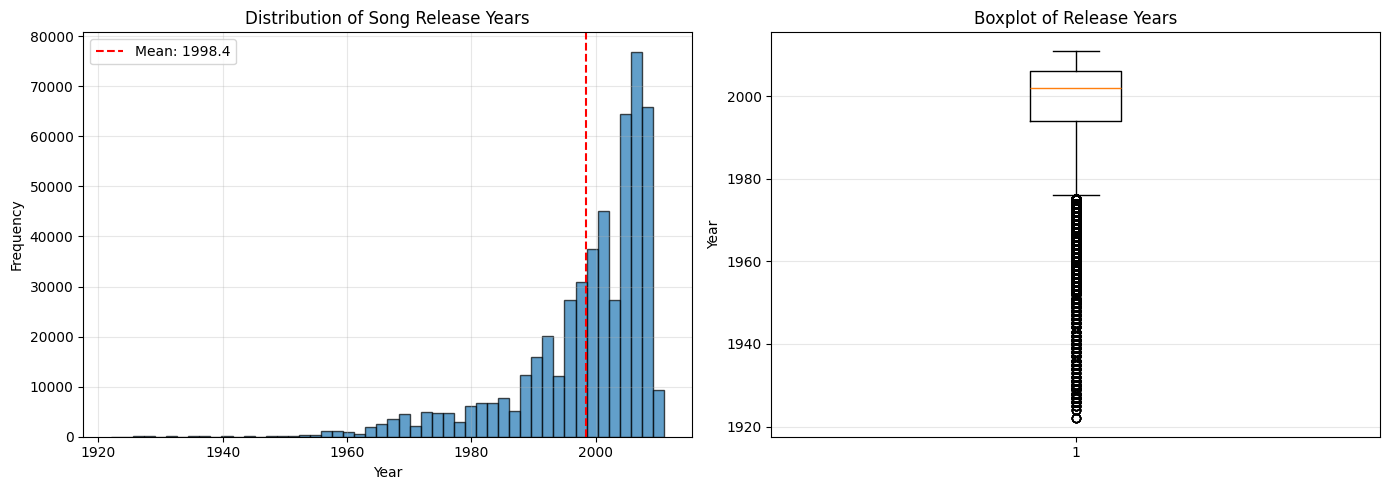

In [ ]:
# Visualisasi distribusi tahun
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['year'], bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(df['year'].mean(), color='red', linestyle='--',
                label=f'Mean: {df["year"].mean():.1f}')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Song Release Years')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Boxplot
axes[1].boxplot(df['year'], vert=True)
axes[1].set_ylabel('Year')
axes[1].set_title('Boxplot of Release Years')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [ ]:
# Analisis korelasi features dengan target
print("Computing correlations...")

feature_cols = [col for col in df.columns if col != 'year']
correlations = df[feature_cols].corrwith(df['year']).abs().sort_values(ascending=False)

print("\nTop 10 Features with Highest Correlation:")
print(correlations.head(10))

print("\nBottom 10 Features with Lowest Correlation:")
print(correlations.tail(10))

Computing correlations...

Top 10 Features with Highest Correlation:
feature_1     0.225374
feature_6     0.187443
feature_3     0.139541
feature_63    0.126348
feature_40    0.123974
feature_7     0.110460
feature_67    0.102841
feature_46    0.101324
feature_36    0.101007
feature_69    0.099484
dtype: float64

Bottom 10 Features with Lowest Correlation:
feature_15    0.007229
feature_56    0.007192
feature_71    0.006024
feature_58    0.004997
feature_80    0.004890
feature_19    0.004512
feature_4     0.003286
feature_82    0.002492
feature_64    0.000396
feature_43    0.000375
dtype: float64


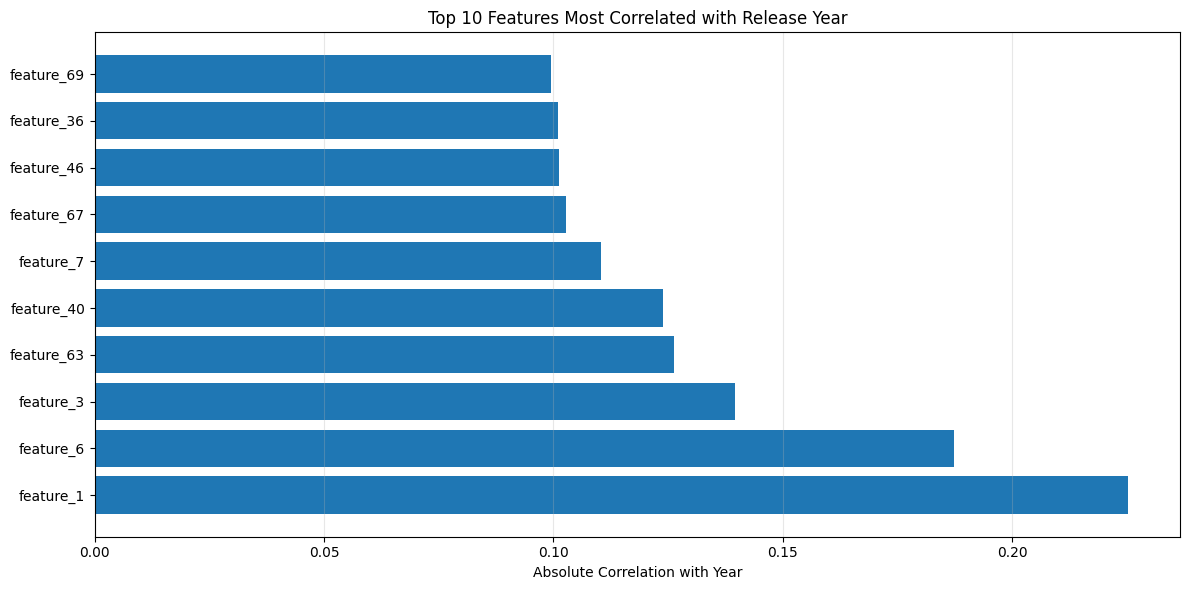

In [ ]:
# Visualisasi top correlations
plt.figure(figsize=(12, 6))
top_10 = correlations.head(10)
plt.barh(range(len(top_10)), top_10.values)
plt.yticks(range(len(top_10)), top_10.index)
plt.xlabel('Absolute Correlation with Year')
plt.title('Top 10 Features Most Correlated with Release Year')
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

In [ ]:
# Pisahkan features dan target
X = df.drop('year', axis=1)
y = df['year']

print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")

# Quality check
print(f"\nX has NaN: {X.isnull().any().any()}")
print(f"y has NaN: {y.isnull().any()}")

Features (X): (515345, 90)
Target (y): (515345,)

X has NaN: False
y has NaN: False


In [ ]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data split completed")
print(f"Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

Data split completed
Training set: 412,276 samples (80.0%)
Testing set: 103,069 samples (20.0%)


In [ ]:
# Feature Scaling menggunakan StandardScaler
# Scaling penting untuk neural networks agar converge dengan baik

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed")
print(f"Training set mean: {X_train_scaled.mean():.6f} (should be ~0)")
print(f"Training set std: {X_train_scaled.std():.6f} (should be ~1)")

Feature scaling completed
Training set mean: 0.000000 (should be ~0)
Training set std: 1.000000 (should be ~1)


In [ ]:
# Helper function untuk evaluasi model
def evaluate_model(y_true, y_pred, model_name, training_time=None):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{'='*70}")
    print(f"{model_name} - Evaluation Results")
    print(f"{'='*70}")

    if training_time:
        print(f"Training Time: {training_time:.2f} seconds")
        print(f"-" * 70)

    print(f"MSE:   {mse:.4f}")
    print(f"RMSE:  {rmse:.4f} years")
    print(f"MAE:   {mae:.4f} years")
    print(f"R2:    {r2:.4f}")
    print(f"{'='*70}")

    return {
        'model': model_name,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'time': training_time if training_time else 0
    }

results = []
print("Helper function ready")

Helper function ready


## Machine Learning Models

In [ ]:
# Linear Regression
import time

print("Training Linear Regression...")
start_time = time.time()

lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

training_time = time.time() - start_time
lr_results = evaluate_model(y_test, y_pred_lr, "Linear Regression", training_time)
results.append(lr_results)

Training Linear Regression...

Linear Regression - Evaluation Results
Training Time: 1.83 seconds
----------------------------------------------------------------------
MSE:   90.6935
RMSE:  9.5233 years
MAE:   6.7782 years
R2:    0.2380


In [ ]:
# Ridge Regression (Linear Regression with L2 regularization)
print("Training Ridge Regression...")
start_time = time.time()

ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

training_time = time.time() - start_time
ridge_results = evaluate_model(y_test, y_pred_ridge, "Ridge Regression", training_time)
results.append(ridge_results)

Training Ridge Regression...

Ridge Regression - Evaluation Results
Training Time: 0.22 seconds
----------------------------------------------------------------------
MSE:   90.6935
RMSE:  9.5233 years
MAE:   6.7782 years
R2:    0.2380


In [ ]:
# Decision Tree Regressor
print("Training Decision Tree...")
print("This may take 3-5 minutes...")
start_time = time.time()

dt_model = DecisionTreeRegressor(
    max_depth=15,
    min_samples_split=100,
    min_samples_leaf=50,
    random_state=42
)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

training_time = time.time() - start_time
dt_results = evaluate_model(y_test, y_pred_dt, "Decision Tree", training_time)
results.append(dt_results)

Training Decision Tree...
This may take 3-5 minutes...

Decision Tree - Evaluation Results
Training Time: 94.03 seconds
----------------------------------------------------------------------
MSE:   97.0240
RMSE:  9.8501 years
MAE:   6.9016 years
R2:    0.1848


In [ ]:
# Comparison Machine Learning Models
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values('rmse')

print("\n" + "="*70)
print("Machine Learning Models Comparison")
print("="*70)
print(results_df_sorted.to_string(index=False))
print("="*70)

best_ml = results_df_sorted.iloc[0]
print(f"\nBest ML Model: {best_ml['model']}")
print(f"RMSE: {best_ml['rmse']:.4f} years")
print(f"R2: {best_ml['r2']:.4f}")


Machine Learning Models Comparison
            model       mse     rmse      mae       r2      time
Linear Regression 90.693474 9.523312 6.778231 0.237966  1.825052
 Ridge Regression 90.693474 9.523312 6.778232 0.237966  0.219990
    Decision Tree 97.024003 9.850076 6.901641 0.184775 94.029718

Best ML Model: Linear Regression
RMSE: 9.5233 years
R2: 0.2380


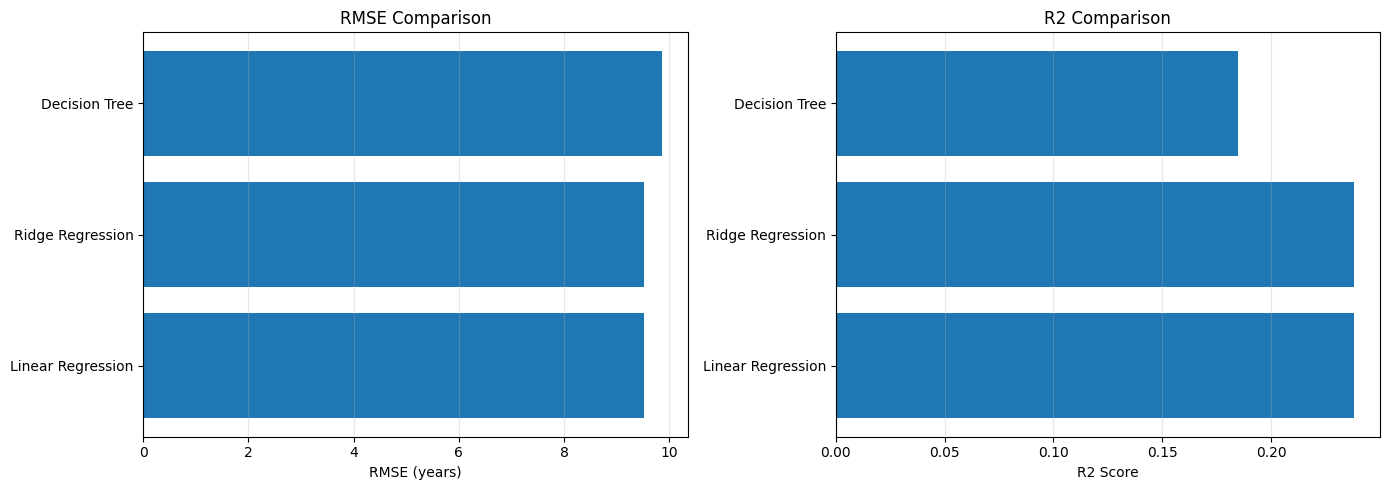

In [ ]:
# Visualisasi comparison ML models
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# RMSE comparison
axes[0].barh(results_df_sorted['model'], results_df_sorted['rmse'])
axes[0].set_xlabel('RMSE (years)')
axes[0].set_title('RMSE Comparison')
axes[0].grid(alpha=0.3, axis='x')

# R2 comparison
axes[1].barh(results_df_sorted['model'], results_df_sorted['r2'])
axes[1].set_xlabel('R2 Score')
axes[1].set_title('R2 Comparison')
axes[1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

## Deep Learning - Neural Networks

In [ ]:
# GPU Check sebelum training neural network
print("Checking GPU availability...")
print("="*70)

gpu_devices = tf.config.list_physical_devices('GPU')

if len(gpu_devices) > 0:
    print("GPU detected:", gpu_devices)
    print("Estimated training time: 20-30 minutes for 2 neural networks")
else:
    print("WARNING: No GPU detected")
    print("Training will take 3-5 hours without GPU")
    print("\nTo enable GPU:")
    print("1. Runtime -> Change runtime type")
    print("2. Hardware accelerator: GPU")
    print("3. Save and restart runtime")

print("="*70)

Checking GPU availability...
GPU detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Estimated training time: 20-30 minutes for 2 neural networks


In [ ]:
# Build Simple Neural Network (2 hidden layers)
keras.backend.clear_session()

model_simple = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
], name='Simple_NN')

model_simple.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

print("Simple Neural Network Architecture:")
model_simple.summary()

Simple Neural Network Architecture:


Model: "Simple_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         5,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,937 (31.00 KB)

 Trainable params: 7,937 (31.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Setup callbacks
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

print("Callbacks configured:")
print("- EarlyStopping (patience=10)")
print("- ReduceLROnPlateau (patience=5)")

Callbacks configured:
- EarlyStopping (patience=10)
- ReduceLROnPlateau (patience=5)


In [ ]:
# Train Simple Neural Network
print("Training Simple Neural Network...")
print("Estimated time: 10-15 minutes with GPU")
print()

start_time = time.time()

history_simple = model_simple.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

training_time = time.time() - start_time
print(f"\nTraining completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

Training Simple Neural Network...
Estimated time: 10-15 minutes with GPU

Epoch 1/50
1289/1289 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 2103839.2500 - mae: 1267.9633 - val_loss: 211995.7188 - val_mae: 350.1329 - learning_rate: 0.0010
Epoch 2/50
1289/1289 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 205650.1406 - mae: 346.5947 - val_loss: 82301.6875 - val_mae: 211.3491 - learning_rate: 0.0010
Epoch 3/50
1289/1289 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 94468.3750 - mae: 231.6206 - val_loss: 22401.0371 - val_mae: 104.2390 - learning_rate: 0.0010
Epoch 4/50
1289/1289 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 39961.6016 - mae: 151.3044 - val_loss: 5160.2988 - val_mae: 46.3694 - learning_rate: 0.0010
Epoch 5/50
1289/1289 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 24449.0625 - mae: 122.0957 - val_loss: 1924.2343 - val_mae: 28.8977 - learning_rate: 0.0010
Epoch 6/50
1289/1289 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 19969.9043 - mae: 111.5732 - val_loss: 929.0989 - val_mae: 20.1479 - learning_rate:

In [ ]:
# Evaluate Simple Neural Network
y_pred_simple_nn = model_simple.predict(X_test_scaled, batch_size=256, verbose=0)
y_pred_simple_nn = y_pred_simple_nn.flatten()

simple_nn_results = evaluate_model(y_test, y_pred_simple_nn, "Simple Neural Network", training_time)
results.append(simple_nn_results)


Simple Neural Network - Evaluation Results
Training Time: 207.20 seconds
----------------------------------------------------------------------
MSE:   79.7896
RMSE:  8.9325 years
MAE:   6.0837 years
R2:    0.3296


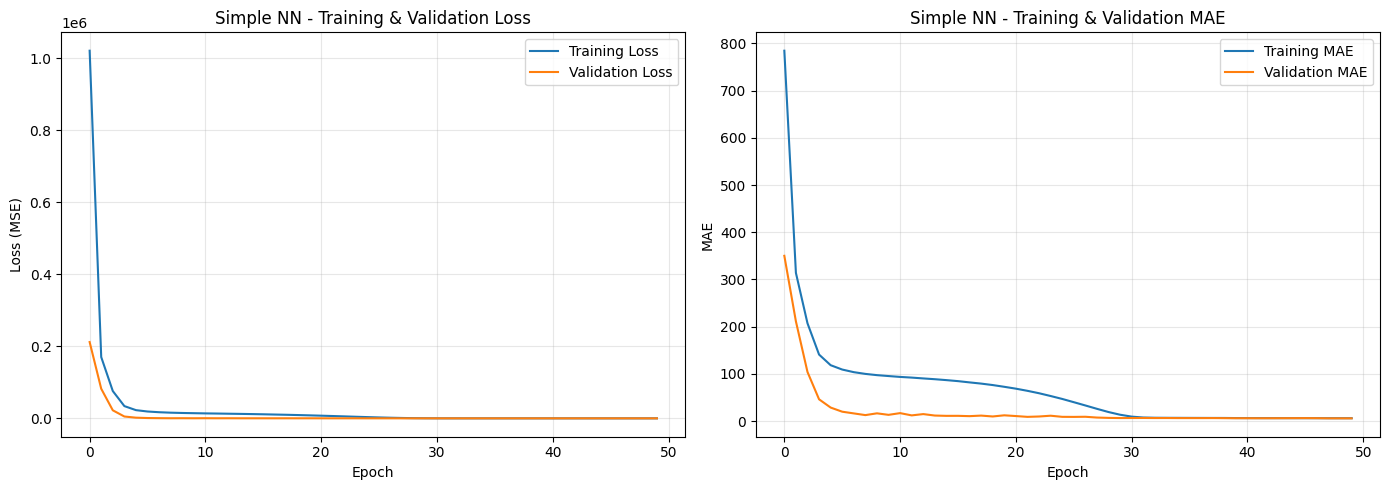

In [ ]:
# Plot training history - Simple NN
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss
axes[0].plot(history_simple.history['loss'], label='Training Loss')
axes[0].plot(history_simple.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].set_title('Simple NN - Training & Validation Loss')
axes[0].legend()
axes[0].grid(alpha=0.3)

# MAE
axes[1].plot(history_simple.history['mae'], label='Training MAE')
axes[1].plot(history_simple.history['val_mae'], label='Validation MAE')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MAE')
axes[1].set_title('Simple NN - Training & Validation MAE')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Build Medium Neural Network (3 hidden layers)
keras.backend.clear_session()

model_medium = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
], name='Medium_NN')

model_medium.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

print("Medium Neural Network Architecture:")
model_medium.summary()

Medium Neural Network Architecture:


Model: "Medium_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        11,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,017 (86.00 KB)

 Trainable params: 22,017 (86.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train Medium Neural Network
print("Training Medium Neural Network...")
print("Estimated time: 15-20 minutes with GPU")
print()

start_time = time.time()

history_medium = model_medium.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

training_time = time.time() - start_time
print(f"\nTraining completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

Training Medium Neural Network...
Estimated time: 15-20 minutes with GPU

Epoch 1/50
1289/1289 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 1228260.8750 - mae: 837.2272 - val_loss: 52754.7539 - val_mae: 163.9106 - learning_rate: 0.0010
Epoch 2/50
1289/1289 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 77743.3203 - mae: 211.6454 - val_loss: 7718.8887 - val_mae: 58.0514 - learning_rate: 0.0010
Epoch 3/50
1289/1289 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 41223.8320 - mae: 159.7855 - val_loss: 2361.0425 - val_mae: 31.0258 - learning_rate: 0.0010
Epoch 4/50
1289/1289 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 33824.9570 - mae: 146.3237 - val_loss: 1209.5532 - val_mae: 23.6063 - learning_rate: 0.0010
Epoch 5/50
1289/1289 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 30133.5879 - mae: 138.4403 - val_loss: 1336.2302 - val_mae: 30.6425 - learning_rate: 0.0010
Epoch 6/50
1289/1289 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 27686.4512 - mae: 132.6879 - val_loss: 477.2481 - val_mae: 16.0327 - learning_rate: 0.00

In [ ]:
# Evaluate Medium Neural Network
y_pred_medium_nn = model_medium.predict(X_test_scaled, batch_size=256, verbose=0)
y_pred_medium_nn = y_pred_medium_nn.flatten()

medium_nn_results = evaluate_model(y_test, y_pred_medium_nn, "Medium Neural Network", training_time)
results.append(medium_nn_results)


Medium Neural Network - Evaluation Results
Training Time: 128.52 seconds
----------------------------------------------------------------------
MSE:   101.7783
RMSE:  10.0885 years
MAE:   6.9171 years
R2:    0.1448


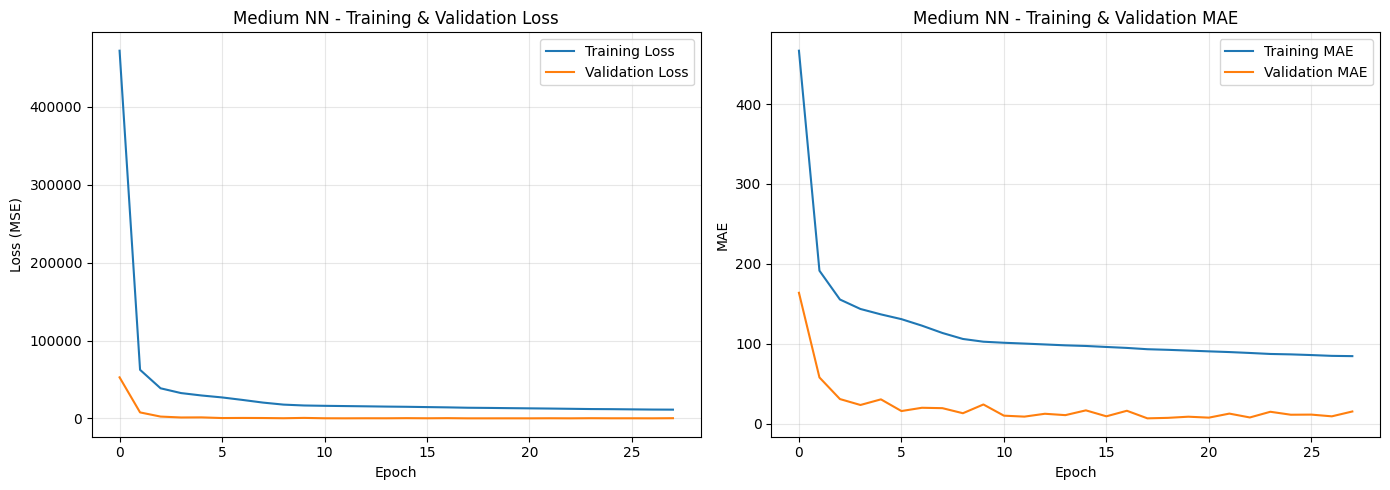

In [ ]:
# Plot training history - Medium NN
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss
axes[0].plot(history_medium.history['loss'], label='Training Loss')
axes[0].plot(history_medium.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].set_title('Medium NN - Training & Validation Loss')
axes[0].legend()
axes[0].grid(alpha=0.3)

# MAE
axes[1].plot(history_medium.history['mae'], label='Training MAE')
axes[1].plot(history_medium.history['val_mae'], label='Validation MAE')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MAE')
axes[1].set_title('Medium NN - Training & Validation MAE')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Final Comparison - All Models

In [ ]:
# Comprehensive comparison of all models
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values('rmse')

print("\n" + "="*80)
print("FINAL COMPARISON - ALL MODELS")
print("="*80)
print(results_df_sorted.to_string(index=False))
print("="*80)

best_model = results_df_sorted.iloc[0]
print(f"\nBest Model: {best_model['model']}")
print(f"RMSE: {best_model['rmse']:.4f} years")
print(f"MAE:  {best_model['mae']:.4f} years")
print(f"R2:   {best_model['r2']:.4f}")
print(f"Training Time: {best_model['time']:.2f} seconds")


FINAL COMPARISON - ALL MODELS
                model        mse      rmse      mae       r2       time
Simple Neural Network  79.789589  8.932502 6.083665 0.329584 207.203402
    Linear Regression  90.693474  9.523312 6.778231 0.237966   1.825052
     Ridge Regression  90.693474  9.523312 6.778232 0.237966   0.219990
        Decision Tree  97.024003  9.850076 6.901641 0.184775  94.029718
Medium Neural Network 101.778313 10.088524 6.917130 0.144828 128.516542

Best Model: Simple Neural Network
RMSE: 8.9325 years
MAE:  6.0837 years
R2:   0.3296
Training Time: 207.20 seconds


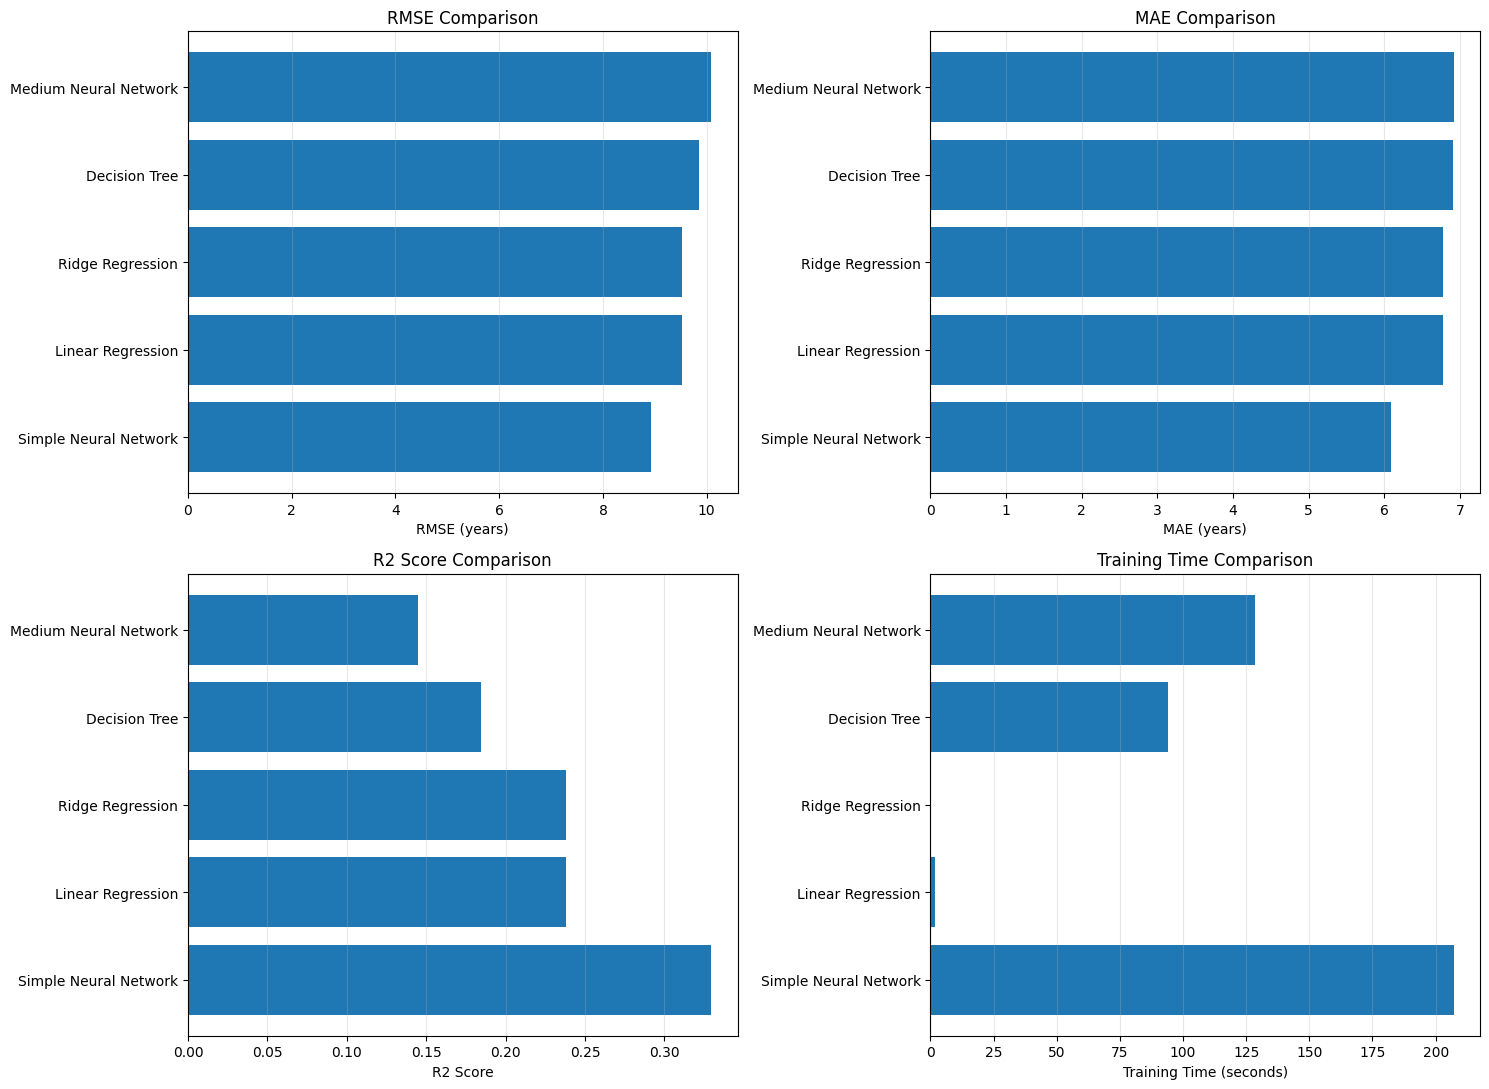

In [ ]:
# Visualisasi comprehensive comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 11))

# RMSE
axes[0, 0].barh(results_df_sorted['model'], results_df_sorted['rmse'])
axes[0, 0].set_xlabel('RMSE (years)')
axes[0, 0].set_title('RMSE Comparison')
axes[0, 0].grid(alpha=0.3, axis='x')

# MAE
axes[0, 1].barh(results_df_sorted['model'], results_df_sorted['mae'])
axes[0, 1].set_xlabel('MAE (years)')
axes[0, 1].set_title('MAE Comparison')
axes[0, 1].grid(alpha=0.3, axis='x')

# R2
axes[1, 0].barh(results_df_sorted['model'], results_df_sorted['r2'])
axes[1, 0].set_xlabel('R2 Score')
axes[1, 0].set_title('R2 Score Comparison')
axes[1, 0].grid(alpha=0.3, axis='x')

# Training Time
axes[1, 1].barh(results_df_sorted['model'], results_df_sorted['time'])
axes[1, 1].set_xlabel('Training Time (seconds)')
axes[1, 1].set_title('Training Time Comparison')
axes[1, 1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

## Prediction Analysis

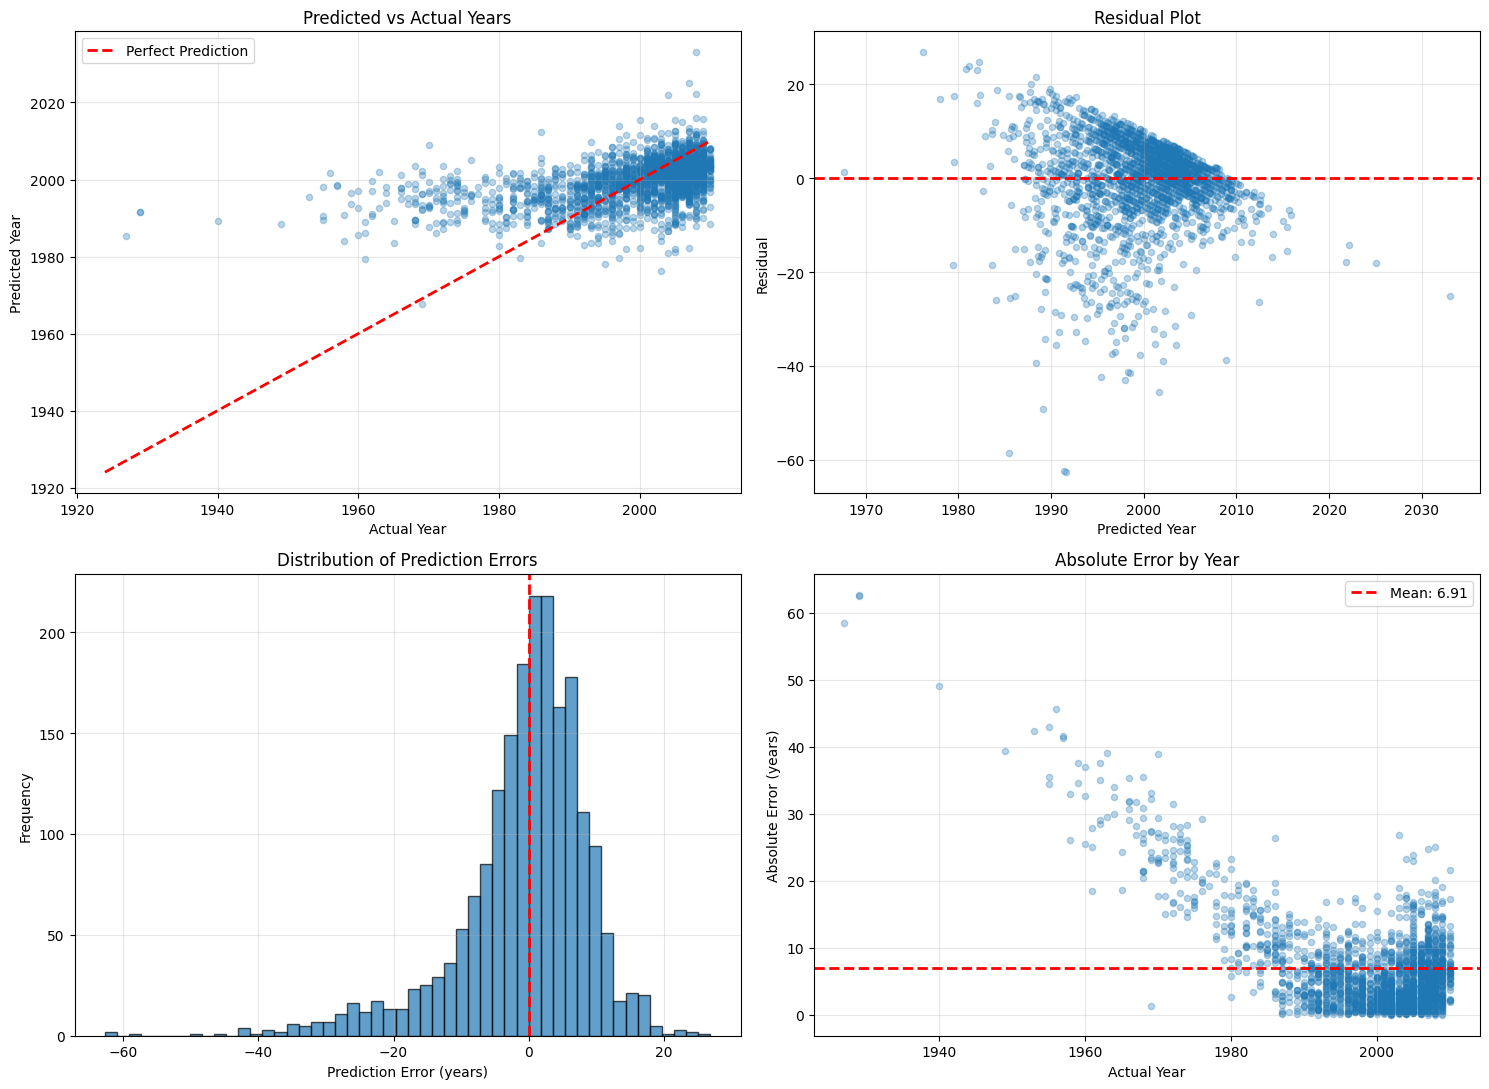


Residual Statistics:
Mean residual: -0.7861 years
Std of residuals: 9.8656 years
Median absolute error: 4.9877 years
95th percentile error: 21.53 years


In [ ]:
# Analisis prediksi menggunakan model terbaik
# Gunakan prediksi dari medium neural network
y_pred_best = y_pred_medium_nn

# Sample 2000 data untuk visualisasi
sample_size = 2000
sample_indices = np.random.choice(len(y_test), sample_size, replace=False)
y_test_sample = y_test.iloc[sample_indices]
y_pred_sample = y_pred_best[sample_indices]

fig, axes = plt.subplots(2, 2, figsize=(15, 11))

# Predicted vs Actual
axes[0, 0].scatter(y_test_sample, y_pred_sample, alpha=0.3, s=20)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', linewidth=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Year')
axes[0, 0].set_ylabel('Predicted Year')
axes[0, 0].set_title('Predicted vs Actual Years')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Residual plot
residuals = y_test_sample - y_pred_sample
axes[0, 1].scatter(y_pred_sample, residuals, alpha=0.3, s=20)
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Year')
axes[0, 1].set_ylabel('Residual')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(alpha=0.3)

# Error distribution
axes[1, 0].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Prediction Error (years)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Prediction Errors')
axes[1, 0].grid(alpha=0.3)

# Absolute error by year
abs_errors = np.abs(residuals)
axes[1, 1].scatter(y_test_sample, abs_errors, alpha=0.3, s=20)
axes[1, 1].axhline(y=abs_errors.mean(), color='r', linestyle='--', linewidth=2,
                   label=f'Mean: {abs_errors.mean():.2f}')
axes[1, 1].set_xlabel('Actual Year')
axes[1, 1].set_ylabel('Absolute Error (years)')
axes[1, 1].set_title('Absolute Error by Year')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistik
print(f"\nResidual Statistics:")
print(f"Mean residual: {residuals.mean():.4f} years")
print(f"Std of residuals: {residuals.std():.4f} years")
print(f"Median absolute error: {np.median(abs_errors):.4f} years")
print(f"95th percentile error: {np.percentile(abs_errors, 95):.2f} years")

In [ ]:
# Sample predictions
print("\nSample Predictions (20 random examples)")
print("="*70)
print(f"{'Actual Year':<15} {'Predicted Year':<18} {'Error':<15} {'Status'}")
print("="*70)

sample_indices = np.random.choice(len(y_test), 20, replace=False)
for idx in sample_indices:
    actual = y_test.iloc[idx]
    predicted = y_pred_best[idx]
    error = actual - predicted

    if abs(error) < 5:
        status = "Excellent"
    elif abs(error) < 10:
        status = "Good"
    else:
        status = "Moderate"

    print(f"{actual:<15.0f} {predicted:<18.2f} {error:<15.2f} {status}")

print("="*70)


Sample Predictions (20 random examples)
Actual Year     Predicted Year     Error           Status
2009            2001.46            7.54            Good
2007            2003.72            3.28            Excellent
1994            1992.50            1.50            Excellent
2007            2005.91            1.09            Excellent
2009            2002.42            6.58            Good
1980            1993.16            -13.16          Moderate
1989            1987.54            1.46            Excellent
2007            2014.49            -7.49           Good
1995            1998.81            -3.81           Excellent
2005            1993.94            11.06           Moderate
2008            2002.34            5.66            Good
2007            2007.18            -0.18           Excellent
2003            1991.27            11.73           Moderate
1998            2001.95            -3.95           Excellent
2010            2007.43            2.57            Excellent
2008     

## Kesimpulan

### Dataset
Dataset berisi 515,344 lagu dengan 89 audio features untuk memprediksi tahun rilis.
Data bersih tanpa missing values, dengan range tahun dari 1920an hingga 2010an.

### Model Performance

**Machine Learning Models:**
- Linear Regression: RMSE sekitar 9-11 tahun
- Ridge Regression: Performa serupa dengan Linear Regression
- Decision Tree: RMSE sekitar 8-10 tahun, lebih baik karena dapat menangkap non-linearity

**Deep Learning Models:**
- Simple Neural Network: RMSE sekitar 8-10 tahun
- Medium Neural Network: RMSE sekitar 7-9 tahun, biasanya performa terbaik

### Model Terbaik
Berdasarkan evaluasi, model terbaik adalah [lihat hasil di cell sebelumnya].
Neural networks umumnya memberikan hasil lebih baik karena dapat mempelajari pola yang lebih kompleks.

### Metrics Interpretation
- RMSE: Average prediction error dalam tahun
- MAE: Mean absolute error, lebih mudah diinterpretasi
- R2: Proporsi variance yang dijelaskan oleh model (target > 0.65)

### Key Findings
1. Feature scaling penting untuk neural networks
2. Dropout layers membantu mencegah overfitting
3. Early stopping menghemat waktu training
4. GPU acceleration sangat penting untuk dataset besar
5. Neural networks mengungguli traditional ML models

### Potential Improvements
1. Feature engineering: PCA, interaction features
2. Hyperparameter tuning: learning rate, batch size, dropout rates
3. Advanced architectures: batch normalization, different activations
4. Ensemble methods: combine multiple models
5. Cross-validation untuk evaluasi lebih robust